# Frequency Shift Keying (FSK) versus Binary Phase Shift Keying (BPSK)

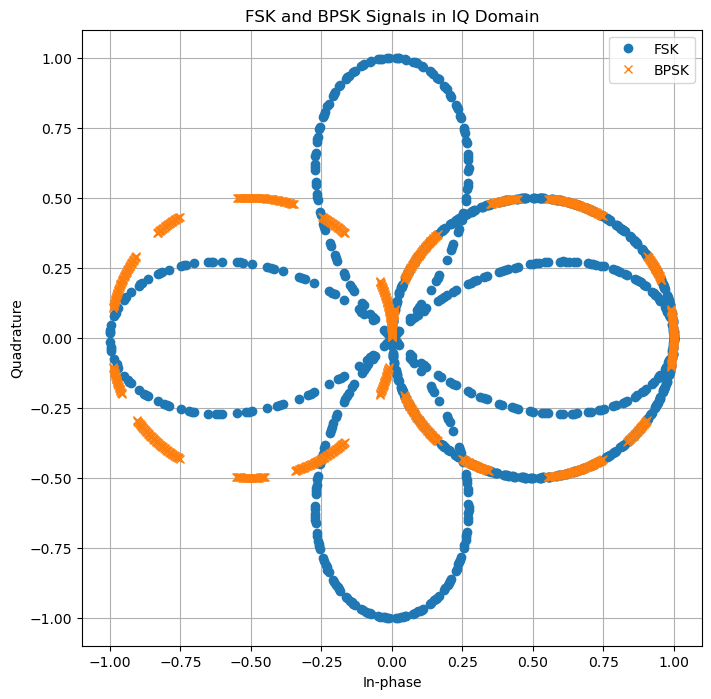

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
T = 1  # Duration in seconds
f0 = 10  # Frequency for bit 0 in FSK
f1 = 20  # Frequency for bit 1 in FSK
f_c = 100  # Carrier frequency for BPSK
data = np.array([0, 1, 0, 1, 1, 0])  # Example data sequence

# Time vector
t = np.linspace(0, T, fs * T)

# FSK signal generation
fsk_signal = np.zeros(len(t))
for i, bit in enumerate(data):
    f = f0 if bit == 0 else f1
    fsk_signal[i * len(t) // len(data):(i + 1) * len(t) // len(data)] = np.cos(2 * np.pi * f * t[i * len(t) // len(data):(i + 1) * len(t) // len(data)])

# BPSK signal generation
bpsk_signal = np.zeros(len(t))
for i, bit in enumerate(data):
    phase = 0 if bit == 0 else np.pi
    bpsk_signal[i * len(t) // len(data):(i + 1) * len(t) // len(data)] = np.cos(2 * np.pi * f_c * t[i * len(t) // len(data):(i + 1) * len(t) // len(data)] + phase)

# IQ components for FSK
I_fsk = fsk_signal * np.cos(2 * np.pi * f0 * t)  # In-phase component for FSK
Q_fsk = fsk_signal * np.sin(2 * np.pi * f0 * t)  # Quadrature component for FSK

# IQ components for BPSK
I_bpsk = bpsk_signal * np.cos(2 * np.pi * f_c * t)  # In-phase component for BPSK
Q_bpsk = bpsk_signal * np.sin(2 * np.pi * f_c * t)  # Quadrature component for BPSK

# Plotting
plt.figure(figsize=(8, 8))

plt.plot(I_fsk, Q_fsk, 'o', label='FSK')
plt.plot(I_bpsk, Q_bpsk, 'x', label='BPSK')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('FSK and BPSK Signals in IQ Domain')
plt.legend()
plt.grid()
plt.show()
